# **Aviation Safety Analysis: Identifying Low-Risk Aircraft for Business Expansion**
___

## **Problem Statement**
As part of its expansion strategy, our company is looking to enter the aviation industry by purchasing and operating aircraft for both commercial and private enterprises. However, the company lacks insights into the potential risks associated with different aircraft types. To ensure informed decision-making, it is critical to identify the safest aircraft options while considering historical accident data, common risk factors, and patterns in aviation incidents.

This project aims to analyze aviation accident data from 1962 to 2023 to uncover trends, assess risk factors, and generate actionable recommendations. By leveraging data cleaning, imputation, and visualization techniques, we will provide the head of the aviation division with insights that support data-driven aircraft selection. 

Our analysis will focus on:

1. **Identifying Aircraft with the Lowest Risk** – Determining which aircraft models and categories have the safest operational history.

2. **Understanding Key Risk Factors** – Examining accident causes, injury severity, and flight conditions that contribute to higher risk.

3. **Providing Business Recommendations** – Translating findings into practical insights that will guide the company's aviation investment strategy.

Through this analysis, we aim to mitigate potential risks and support a strategic entry into the aviation industry.
___

## **Project Overview** 
### **Project Objective**
Our company is venturing into the aviation industry but lacks insights into aircraft safety risks. This project analyzes aviation accident data to identify low-risk aircraft, guiding strategic purchasing decisions with data-driven recommendations.

### **Project Approach**
To achieve this, we will:

1. **Clean and preprocess the data** – Address missing values and inconsistencies.

2. **Analyze accident trends** – Identify key risk factors.

3. **Assess aircraft safety** – Determine which models have the safest records.

4. **Visualize insights** – Use clear, impactful visuals to communicate findings.

5. **Provide business recommendations** – Support informed decision-making.
___

## **Dataset Overview**
To make informed decisions about aircraft safety and operational risks, we are analyzing two datasets from the National Transportation Safety Board (NTSB):

### **1. Aviation Accident Data (`df1`)** 
This dataset contains 88,889 records across 31 columns, documenting aviation incidents from 1962 to 2023. It provides a comprehensive view of:

- **Accident details** – Date, location, phase of flight, and severity.

- **Aircraft information** – Make, model, engine type, and category.

- **Injury reports** – Number of fatalities, serious injuries, and uninjured individuals.

- **Environmental and operational factors** – Weather conditions, flight purpose, and airport details.

### **2. U.S. State Codes (`df2`)**
A reference dataset with 62 records, mapping state names to their standard abbreviations. This will help standardize location data for better analysis.

### **Why This Data Matters**
Aviation accidents result from a combination of factors, and understanding these patterns is key to risk assessment. By analyzing trends in aircraft safety, we aim to determine which aircraft have the lowest accident rates and provide actionable recommendations for strategic investments in the aviation sector.

Next, we will clean and explore the data to uncover valuable insights.
___

### 

## **Importing Libraries and Loading Our Datasets**

To begin our analysis, we import key Python libraries that will help us manipulate data and create visualizations:  
- **pandas (`pd`)** – For data manipulation and analysis.  
- **numpy (`np`)** – For numerical operations.  
- **matplotlib (`plt`)** – For basic data visualization.  
- **seaborn (`sns`)** – For enhanced statistical visualizations.  

We then load our datasets:  
- `df1`: The **Aviation Accident Data** file (`AviationData.csv`), which contains detailed information on aviation accidents.  
- `df2`: The **U.S. State Codes** file (`USState_Codes.csv`), which contains selected incidents in the United States and international waters.  

We use `encoding='latin-1'` to handle special characters and `low_memory=False` to optimize performance when loading `df1`, as it is a large dataset.  


In [272]:
# Importing all the necessary libraries to ensure my code runs efficiently 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set_style('whitegrid')

# Ensuring all columns are displayed
pd.set_option('display.max_columns', 40)

# Opening and reading the data files
df1 = pd.read_csv('AviationData.csv', encoding ='latin-1', low_memory=False)
df2 = pd.read_csv('USState_Codes.csv')

## **Initial Data Exploration**
We need to gain a fair understanding of our dataset before we start cleaning or processing it. 
This involves: 
* **Checking the first few rows** - to get a preview of the data
* **Checking the dataset information** - to understand column names, data types and missing values 
* **Checking for missing values** - to determine how much data is missing 
* **Checking for duplicate rows** - to ensure there are no unnecessary duplicates 
* **Understanding numerical statistics** - to get an overview of numerical columns 

##### **1. Checking the first few rows to get get a preview of the data**

In [273]:
# preview of aviation accident data file 
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [274]:
#preview of selected incidents in the United States 
df2.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


##### **2. Checking the dataset information (column names, data types, missing values)**

In [307]:
#df1 column names, data types and non-null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [308]:
#df2 column names, data types and non-null values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   US_State      62 non-null     object
 1   Abbreviation  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


##### **3. To determine how much data is missing** 

##### Missing Values in df1

In [277]:
#missing values in df1
df1.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

df1 has some missing values which we are going to explore further later when we start cleaning the data. 

##### Missing Values in df2

In [279]:
#missing values in df2
df2.isna().sum()

US_State        0
Abbreviation    0
dtype: int64

There are no missing values in df2

##### **4. Checking for duplicates in the datasets**

##### **Duplicates in df1**

In [309]:
# check for duplicates in df1 
df1.duplicated().sum()

0

There are no duplicates in df1

##### **Duplicates in df2**

In [310]:
# Check for duplicates in df2 
df2.duplicated().sum()

0

There are no duplicates in df2 either

##### **5. Understanding the numerical statistics**

We conducted this step for df1 only because df2 has object types only

In [ ]:
# df1 numerical statitics summary 
df1.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Out of all the columns in df1, only 'Number.of.Engines', 'Total.Fatal.Injuries','Total.Serious.Injuries', 'Total.Minor.Injuries', and 'Total.Uninjured' contain numerical values and their numerical statistics summary is as shown above.  

##### **List of columns in the datasets**
To further understand out dataset, we used .columns method to see a list of all the columns in the dataset

In [286]:
#list of all columns in df1
df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## **Data Cleaning**  

Before analyzing the dataset, it is essential to clean and preprocess the data to ensure accuracy and reliability. This process involves:  

1. **Handling Missing Values** – Identifying and addressing gaps in the data.  
2. **Detecting and Cleaning Invalid Values** – Ensuring data consistency based on expected data types.  
3. **Removing Duplicates** – Although no duplicates were found in this dataset, this is typically an important step in data cleaning.  
4. **Data Visualization** – Exploring patterns, trends, and anomalies to draw meaningful insights.  

By performing these steps, we ensure that the dataset is well-structured and ready for analysis.  

### **1. Missing Values in the Dataset**
Missing values can impact our analysis by introducing bias or reducing the accuracy of insights. By visualizing the missing data, we can determine which columns require imputation, removal, or further investigation. The bar plot below shows the number of missing values per column, helping us make informed decisions on data cleaning.

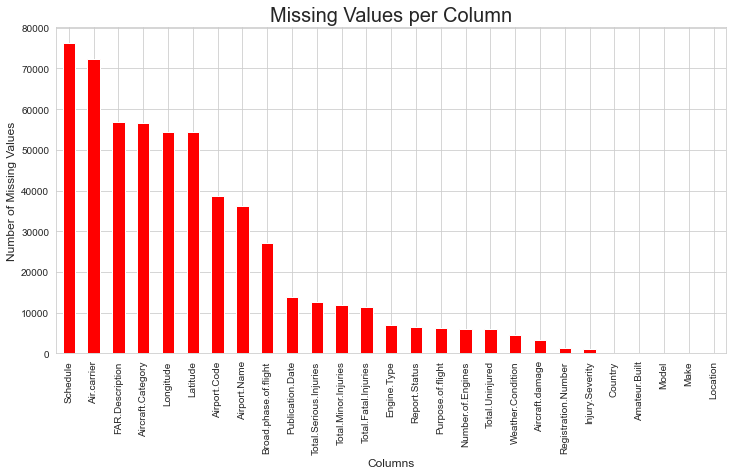

In [287]:
# A bar plot to show the distribution of missing data. 

missing_counts = df1.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(12,6))
missing_counts.plot(kind='bar', color='red')
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Missing Values", fontsize=12)
plt.title("Missing Values per Column", fontsize=20)
plt.xticks(rotation=90)
plt.show()

### **Handling missing values**

Missing data can impact the quality of our analysis and lead to biased insights. In this section, we will address missing values in our dataset to ensure accuracy and consistency.  

#### **Approach:**  
- **Drop columns with excessive missing values** – If a column is mostly empty, it might not be useful for our analysis.  
- **Drop rows with missing critical information** – If a row lacks essential details, it may be best to remove it.    
- **Keep some missing values** – In certain cases, missing values may still hold meaning and will be left as-is.  

This step is crucial to maintaining data integrity before proceeding with further analysis.

##### **a). Creating a Copy of the Dataset**
Before making any modifications, we will create a copy of our dataset. This ensures that we always have the original data intact in case we need to refer back to it.

In [288]:
# create a copy of our dataset
df1_copy = df1.copy()

##### **b). Dropping columns with excessive missing values** 
Now that we have identified columns with excessive missing values, the next step is deciding how to handle them. We can choose to Drop columns with excessive missing values especially if they are unlikely to add significant value to our analysis.

The following columns have excessive missing values and are unlikely to contribute meaningful insights.

In [289]:
# sum of null values in respective columns
df1_copy.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [290]:
#drop columns with lots of missing values, that are unlikely to contribute meaningful insights to our analysis. 
df1_copy.drop(columns=['Latitude', 'Longitude', 'Schedule', 'Air.carrier', 'FAR.Description', 'Airport.Code','Broad.phase.of.flight','Airport.Name'], inplace=True)

#confirming the changes 
df1_copy.shape

(88889, 23)

Eight columns have been dropped, leaving us with 23 columns 

##### **c). Missing values in the remaining dataset (Dropping rows with missing data)**
In the step above, we dropped columns with a lot of missing data that may not bear any significance to our analysis. 

Now we move on to missing data in columns that are significant to our analysis. 

We are going to drop the rows with missing values to ensure our analysis is accurate. 

In [302]:
#drop rows with missing values for columns with significant details

df1_copy.dropna(subset=['Injury.Severity','Aircraft.Category','Aircraft.damage','Make', 'Model','Number.of.Engines', 'Engine.Type', 'Purpose.of.flight','Amateur.Built','Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Report.Status', 'Publication.Date'], inplace=True)

In [305]:
# confirming that our changes have been implemented

df1_copy.shape

(19787, 23)

### **2. Handling Invalid Values (Based on data type)**

To ensure data consistency, we need to correct data types for specific columns:  

1. **Event Date** – Currently stored as an object (string), but it represents dates. We will convert it to a proper datetime format for accurate time-based analysis.  
2. **Amateur Built** – This column is also stored as an object but should be a boolean category (`Yes/No`). We will standardize it by ensuring only valid values are retained and converting it into a proper boolean format.  

By making these adjustments, we ensure that our dataset is properly structured for further analysis.  
 


#### **a). Establishing Each Column's Data Types**
The first step is to establish our column data types in order to establish which ones need to be corrected. 

In [306]:
df1_copy.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Report.Status              object
Publication.Date           object
dtype: object

From the above list of columns, the only ones thst needed some corrections are the 'Event.Date', the 'Publication.Date' and the 'Amateur.Built'. They need to be converted to datetime and Boolean datatypes respectively. 

##### **i). Converting dates to datetime format**

In [313]:
# Convert 'Event.Date' and 'Publication.Date' to datetime format
df1_copy['Event.Date'] = pd.to_datetime(df1_copy['Event.Date'], errors='coerce')
df1_copy['Publication.Date'] = pd.to_datetime(df1_copy['Publication.Date'], errors='coerce')

# Confirmation
df1_copy.dtypes


Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Weather.Condition                 object
Report.Status                     object
Publication.Date          datetime64[ns]
dtype: object

In [314]:
df['Amateur.Built']

NameError: name 'df' is not defined

##### **ii). **

### **Detecting outliers**
Outliers are data points that significantly differ from the rest of the dataset. They can be caused by data entry errors, rare events, or natural variations. Detecting and handling outliers is crucial because they can skew analysis and impact model performance.

A common way to visualize outliers is through boxplots, which highlight extreme values beyond the interquartile range (IQR).

Next, we'll use boxplots to identify outliers in key numerical columns.

##### **Visualizing Outliers Using Boxplots**

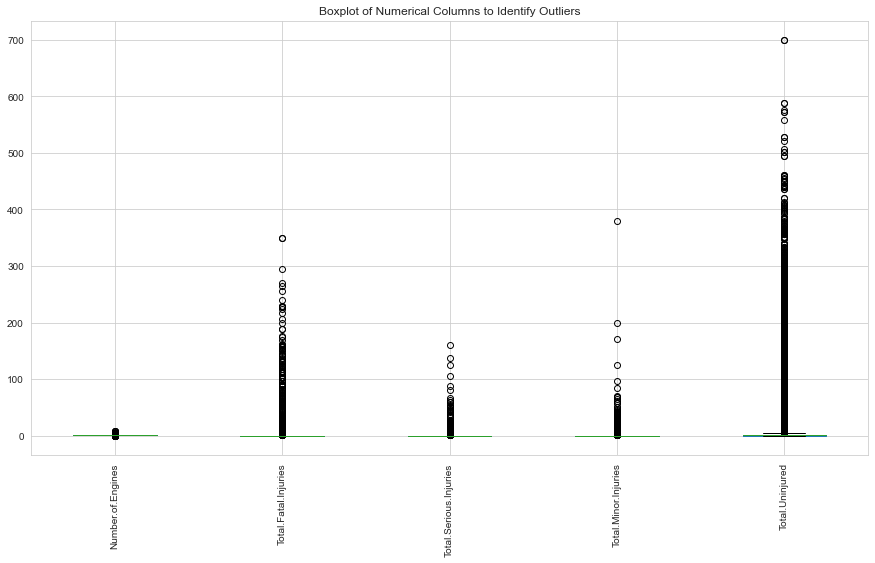

In [294]:
# Selecting numerical columns
num_cols = df1_copy.select_dtypes(include=['number']).columns

# Setting up the figure
plt.figure(figsize=(15, 8))

# Creating boxplots
df1_copy[num_cols].boxplot(rot=90)  # Rotating x-axis labels for readability

# Title and display
plt.title('Boxplot of Numerical Columns to Identify Outliers')
plt.show()


##### **How we handled our outliers** 
In aviation accident data, extreme values may represent critical incidents rather than data entry errors. Since these outliers could provide valuable insights, I have decided to retain them rather than remove or modify them. This ensures that the analysis remains accurate and does not overlook potentially important patterns related to severe accidents.


## **Understanding Relationships betwenn Variables**


### **Correlation Analysis** 
A correlation matrix helps identify relationships between numerical variables. Strong positive or negative correlations can provide insights into how different factors interact in aviation accidents. The heatmap visually represents these correlations, where darker colors indicate stronger relationships.  


##### **1. Compute the correlation matrix** 

In [295]:
# Compute correlation matrix for numerical columns
correlation_matrix = df1_copy.corr()

# Display the correlation matrix
correlation_matrix


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,1.000000,0.098505,0.046157,0.098162,0.406058
Total.Fatal.Injuries,0.098505,1.000000,0.135724,0.073559,-0.015214
Total.Serious.Injuries,0.046157,0.135724,1.000000,0.326849,0.052869
Total.Minor.Injuries,0.098162,0.073559,0.326849,1.000000,0.147770
Total.Uninjured,0.406058,-0.015214,0.052869,0.147770,1.000000


#### **2. Visualizing the correlation matrix**

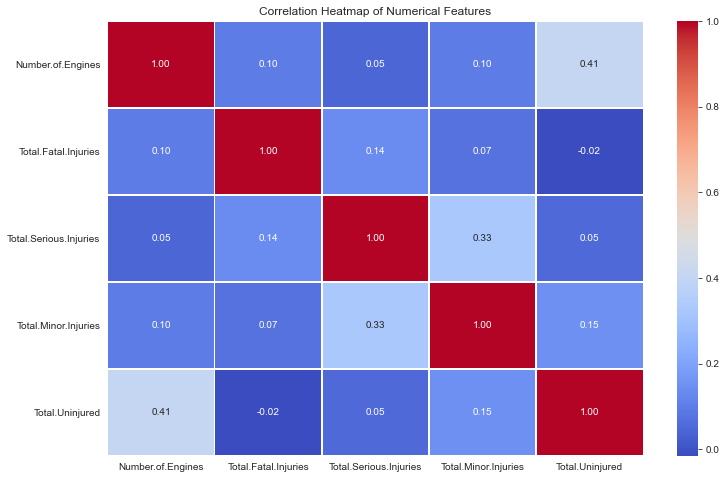

In [296]:
# Set figure size
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Numerical Features")

# Show plot
plt.show()

### **Categorical Variable Relationships**
Understanding categorical variables can reveal patterns in aviation accidents. We visualize factors like Injury Severity, Weather Conditions, and Aircraft Damage to identify trends that might contribute to accident outcomes.  


##### **Weather Conditions During Accidents**

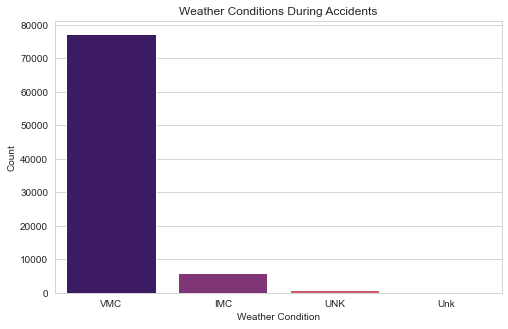

In [297]:
#countplot for weather conditions during accidents 
plt.figure(figsize=(8,5))
sns.countplot(data=df1_copy, x="Weather.Condition", order=df1_copy["Weather.Condition"].value_counts().index, palette="magma")
plt.title("Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()



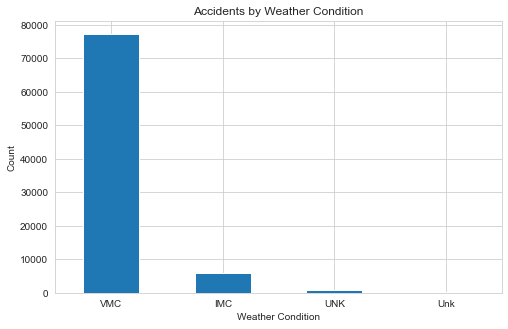

In [298]:
# Bar plot for weather conditions during accidents
df1_copy['Weather.Condition'].value_counts().plot(kind='bar', figsize=(8,5))
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


#####  **Aircraft Damage Distribution**
This distribution helps us understand how often aircraft are destroyed or sustain substantial damage in accidents.  

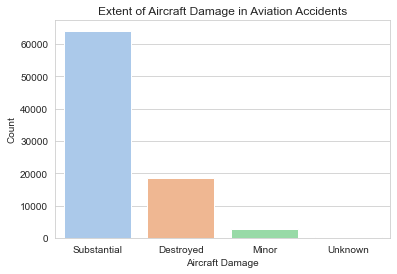

In [299]:
plt.figure(figsize=(6,4))
sns.countplot(data=df1_copy, x="Aircraft.damage", order=df1_copy["Aircraft.damage"].value_counts().index, palette="pastel")
plt.title("Extent of Aircraft Damage in Aviation Accidents")
plt.xlabel("Aircraft Damage")
plt.ylabel("Count")
plt.show()


##### **Purpose of Flight Distribution**
This distribution gives insight into whether accidents are more common during personal, business, training, or other flight types.  

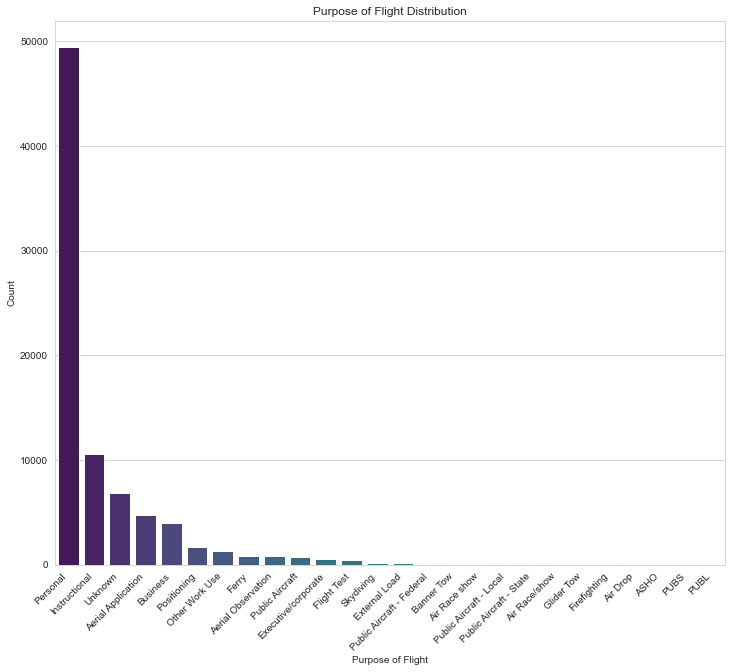

In [300]:
plt.figure(figsize=(12,10))  # Increased width for better readability
sns.countplot(data=df1_copy, x="Purpose.of.flight", order=df1_copy["Purpose.of.flight"].value_counts().index, palette="viridis")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.title("Purpose of Flight Distribution")
plt.xlabel("Purpose of Flight")
plt.ylabel("Count")
plt.show()
